<a href="https://colab.research.google.com/github/ELENAZAZA/Formal-method-project/blob/main/Smarthome_process_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [319]:
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [320]:
# This is a sample Python script.

# Press Maiusc+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.


    #Use a breakpoint in the code line below to debug your script.


# Press the green button in the gutter to run the script.
import pandas
import pm4py
import os

from matplotlib import pyplot as plt
from pm4py.objects.conversion.log import converter as log_converter
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
#from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.petri_net import visualizer as pt_visualiser
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.sna import visualizer as sna_visualiser
from pm4py.algo.organizational_mining.sna import algorithm as sna_factory
import seaborn as sns
import pandas as pd

In [321]:
log = pandas.read_csv('/content/drive/MyDrive/petriNET/dataset.CSV', sep=';', header=0)
d_log = pm4py.format_dataframe(log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
#d_event_log.rename(columns={'case ID': 'case:concept:name', 'activity': 'concept:name' ,'timestamp': 'time:timestamp'}, inplace=True)
    # Convert to log format
#log = log_converter.apply(d_event_log)
#filtered_log = pm4py.filter_variants_top_k(log, 3)
log = pm4py.convert_to_event_log(d_log)


<ipython-input-321-43b966482afb>:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  d_log = pm4py.format_dataframe(log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

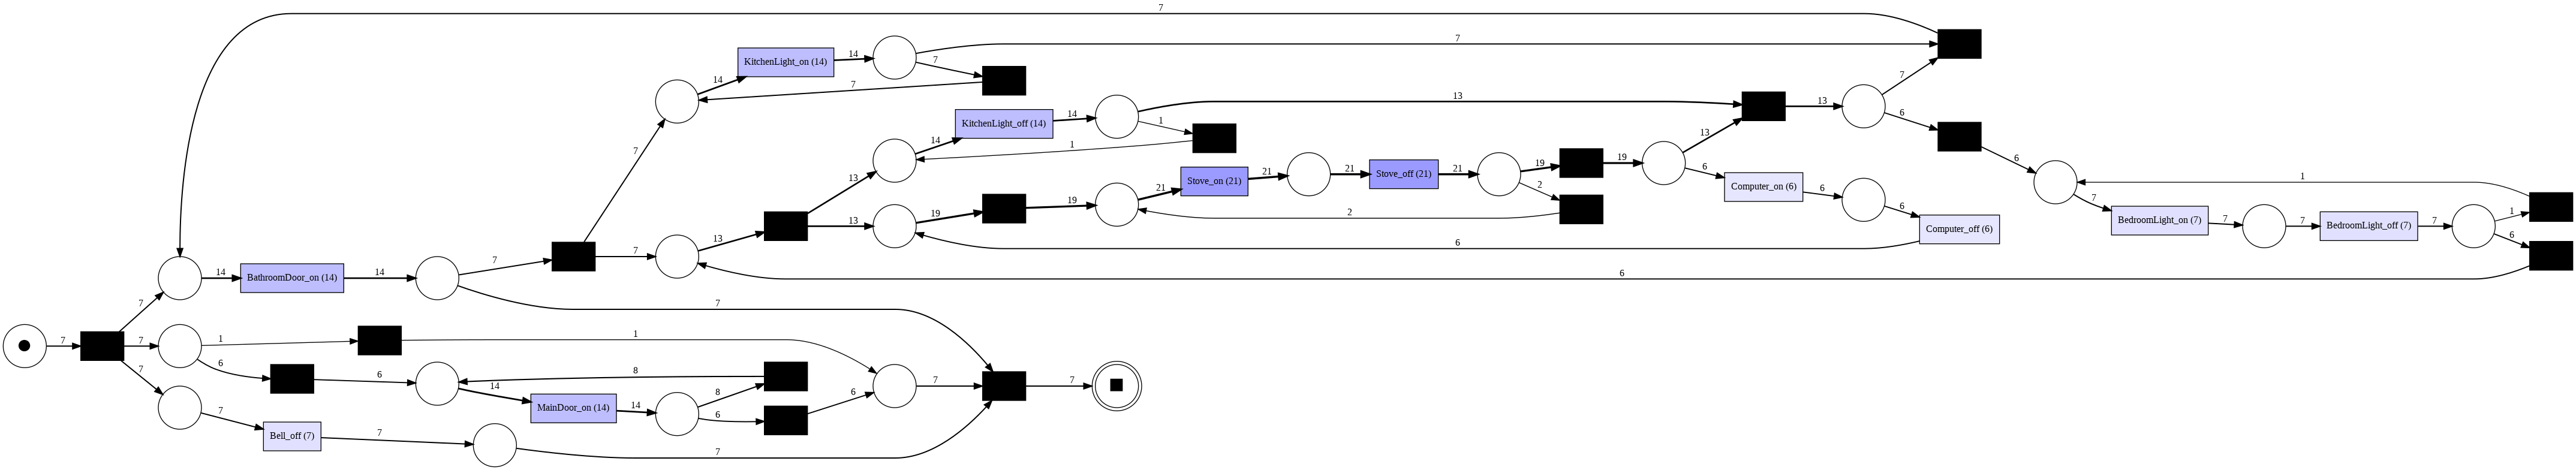

In [322]:
net, im, fm =pm4py.discover_petri_net_inductive(log)
pm4py.save_vis_petri_net(net, im, fm, 'petri_net.png')

graph_visualisation = pt_visualiser.apply(net, im, fm, variant=pt_visualiser.Variants.FREQUENCY, log=log)
pt_visualiser.view(graph_visualisation)
pt_visualiser.save(graph_visualisation, 'PetriNet.png')

In [323]:

replayed_traces = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)
print(replayed_traces)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

[{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(tau_1, None), (init_loop_8, None), (329dc16e-5c10-4c91-b237-921e76aec25a, 'MainDoor_on'), (5626754d-ad4c-415c-b108-92a94d4f7320, 'Bell_off'), (c6ac3118-96db-4502-838e-e44edb9a8479, 'BathroomDoor_on'), (tauSplit_14, None), (tauSplit_22, None), (init_loop_30, None), (e486f85b-8556-4481-87a2-b2c82ac484ae, 'Stove_on'), (eff1ed4b-5405-468c-ba3a-5312c37861f2, 'Stove_off'), (1a468287-f499-4f77-a3f8-38be2aa6eadd, 'KitchenLight_on'), (skip_32, None), (e486f85b-8556-4481-87a2-b2c82ac484ae, 'Stove_on'), (eff1ed4b-5405-468c-ba3a-5312c37861f2, 'Stove_off'), (9ad5e38a-d228-4103-82cd-e36fd73c1a08, 'KitchenLight_off'), (skip_18, None), (1a468287-f499-4f77-a3f8-38be2aa6eadd, 'KitchenLight_on'), (skip_32, None), (e486f85b-8556-4481-87a2-b2c82ac484ae, 'Stove_on'), (eff1ed4b-5405-468c-ba3a-5312c37861f2, 'Stove_off'), (skip_10, None), (329dc16e-5c10-4c91-b237-921e76aec25a, 'MainDoor_on'), (skip_10, None), (329dc16e-5c10-4c91-b237-921e

In [324]:
wrong_log = pandas.read_csv('/content/drive/MyDrive/petriNET/dataset_problems.CSV', sep=';', header=0)
dw_log = pm4py.format_dataframe(wrong_log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
#d_event_log.rename(columns={'case ID': 'case:concept:name', 'activity': 'concept:name' ,'timestamp': 'time:timestamp'}, inplace=True)
    # Convert to log format
#log = log_converter.apply(d_event_log)
#filtered_log = pm4py.filter_variants_top_k(log, 3)
logw = pm4py.convert_to_event_log(dw_log)

<ipython-input-324-e4ff33168034>:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dw_log = pm4py.format_dataframe(wrong_log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [325]:
netw, imw, fmw =pm4py.discover_petri_net_inductive(logw)


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

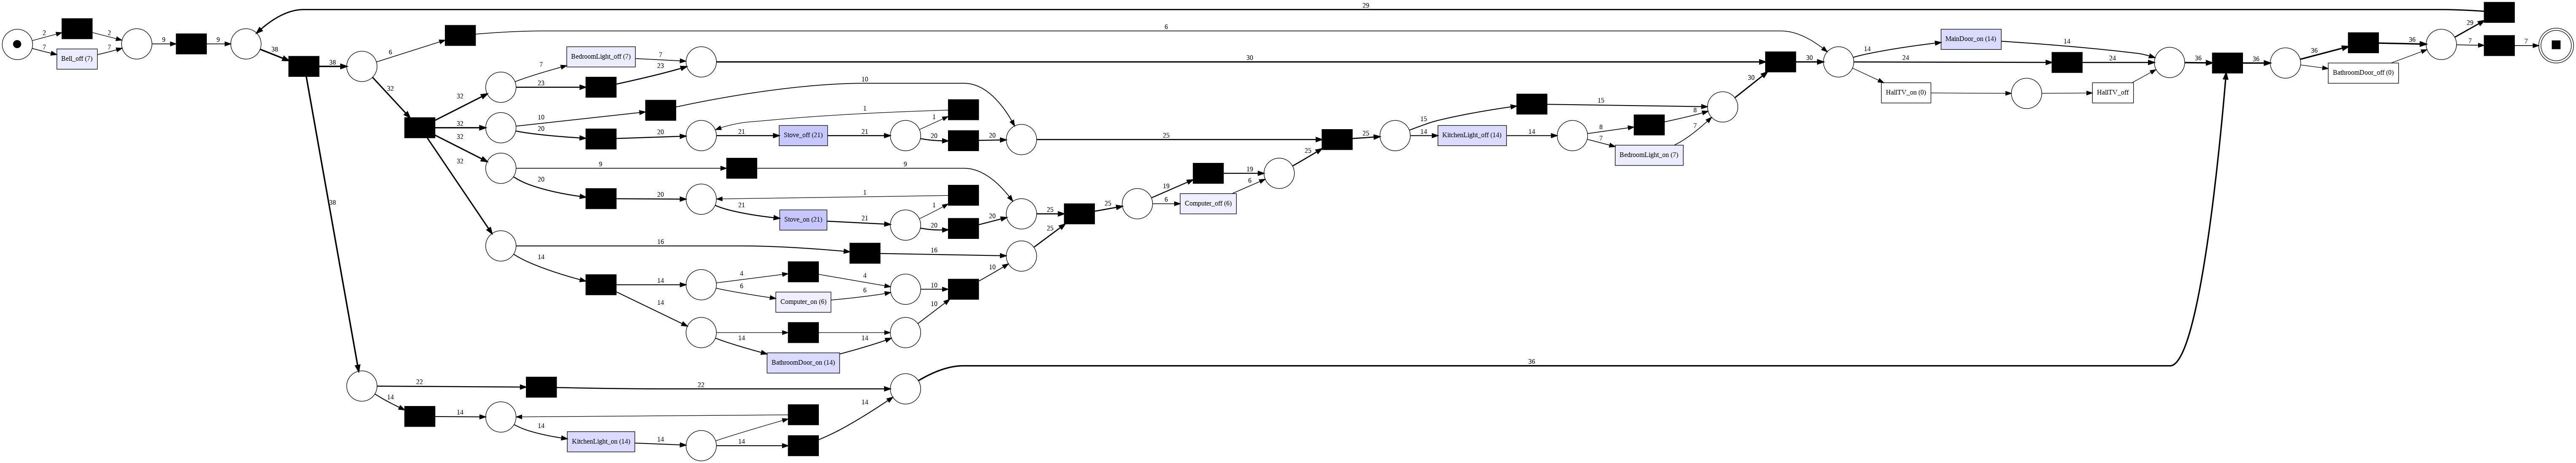

In [326]:
pm4py.save_vis_petri_net(netw, imw, fmw, 'petri_netw.png')

graph_visualisation = pt_visualiser.apply(netw, imw, fmw, variant=pt_visualiser.Variants.FREQUENCY, log=log)
pt_visualiser.view(graph_visualisation)
pt_visualiser.save(graph_visualisation, 'PetriNetw.png')

In [327]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

parameters_tbr = {token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.DISABLE_VARIANTS: True, token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.ENABLE_PLTR_FITNESS: True}
replayed_traces, place_fitness, trans_fitness, unwanted_activities = token_based_replay.apply(log, netw, imw, fmw, parameters=parameters_tbr)
print(replayed_traces, end='\n')


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

[{'trace_is_fit': False, 'trace_fitness': 0.9380431735351836, 'activated_transitions': [(skip_2, None), (init_loop_3, None), (tauSplit_5, None), (skip_12, None), (11672026-eff5-4f7d-9a3d-01b0bee4a66e, 'MainDoor_on'), (165d8238-faba-42c5-9dd0-61c53a5b2c01, 'Bell_off'), (init_loop_3, None), (tauSplit_5, None), (tauSplit_13, None), (tauSplit_31, None), (926c6dc8-11a4-40f1-b919-f421496052ce, 'BathroomDoor_on'), (init_loop_26, None), (11e1c729-b1df-4fc5-bd69-934a459bc0d5, 'Stove_on'), (init_loop_19, None), (c70f7e39-3f35-4649-82bd-663d23e0131f, 'Stove_off'), (init_loop_8, None), (cee407f5-649b-424a-b4bf-fdebd01496bd, 'KitchenLight_on'), (skip_28, None), (11e1c729-b1df-4fc5-bd69-934a459bc0d5, 'Stove_on'), (skip_21, None), (c70f7e39-3f35-4649-82bd-663d23e0131f, 'Stove_off'), (skip_22, None), (skip_29, None), (skip_33, None), (tauJoin_32, None), (tauJoin_24, None), (skip_35, None), (skip_11, None), (tauJoin_6, None), (skip_39, None), (skip_40, None), (tauSplit_5, None), (tauSplit_13, None), (s

## **Conformance Checking**

In [328]:
i=0
for i in range (len(replayed_traces)):
  if( (replayed_traces[i]['trace_is_fit']) == True ):
      print("L'attività si adatta al modello. \n")
  else:
      print("L'attività non si adatta al modello. \n")

L'attività non si adatta al modello. 

L'attività non si adatta al modello. 

L'attività non si adatta al modello. 

L'attività si adatta al modello. 

L'attività si adatta al modello. 

L'attività non si adatta al modello. 

L'attività si adatta al modello. 



In [329]:
i=0
print("Transizioni attivate dal modello: \n")
for i in range (len(replayed_traces)):
  print(replayed_traces[i]['activated_transitions'], "\n")


#aggiustare output come fatto sotto

Transizioni attivate dal modello: 

[(skip_2, None), (init_loop_3, None), (tauSplit_5, None), (skip_12, None), (11672026-eff5-4f7d-9a3d-01b0bee4a66e, 'MainDoor_on'), (165d8238-faba-42c5-9dd0-61c53a5b2c01, 'Bell_off'), (init_loop_3, None), (tauSplit_5, None), (tauSplit_13, None), (tauSplit_31, None), (926c6dc8-11a4-40f1-b919-f421496052ce, 'BathroomDoor_on'), (init_loop_26, None), (11e1c729-b1df-4fc5-bd69-934a459bc0d5, 'Stove_on'), (init_loop_19, None), (c70f7e39-3f35-4649-82bd-663d23e0131f, 'Stove_off'), (init_loop_8, None), (cee407f5-649b-424a-b4bf-fdebd01496bd, 'KitchenLight_on'), (skip_28, None), (11e1c729-b1df-4fc5-bd69-934a459bc0d5, 'Stove_on'), (skip_21, None), (c70f7e39-3f35-4649-82bd-663d23e0131f, 'Stove_off'), (skip_22, None), (skip_29, None), (skip_33, None), (tauJoin_32, None), (tauJoin_24, None), (skip_35, None), (skip_11, None), (tauJoin_6, None), (skip_39, None), (skip_40, None), (tauSplit_5, None), (tauSplit_13, None), (skip_25, None), (skip_7, None), (skip_15, None), (ta

In [330]:
#Vedere le transizioni che non combaciano con il modello
#lista di lista di transizioni
i=0
j=0
day = ['Lunedi', 'Martedi', 'Mercoledi', 'Giovedi', 'Venerdi', 'Sabato', 'Domenica']
print("Attivita' con anomalie: \n")
for i in range (len(replayed_traces)):
  print(day[i], ": \n")
  if(bool(replayed_traces[i]['transitions_with_problems'])):
    for j in range (len(replayed_traces[i]['transitions_with_problems'])):
      print(replayed_traces[i]['transitions_with_problems'][j].label)
  else:
      print("Nessuna anomalia riscontrata. \n")
  print("\n")

Attivita' con anomalie: 

Lunedi : 

Bell_off
KitchenLight_off
MainDoor_on
KitchenLight_off


Martedi : 

BedroomLight_on
MainDoor_on
BedroomLight_off


Mercoledi : 

BedroomLight_on
BedroomLight_off


Giovedi : 

Nessuna anomalia riscontrata. 



Venerdi : 

Nessuna anomalia riscontrata. 



Sabato : 

Bell_off
KitchenLight_off
KitchenLight_off


Domenica : 

Nessuna anomalia riscontrata. 





In [331]:
dir(replayed_traces[0]['transitions_with_problems'][0])

['_Transition__get_in_arcs',
 '_Transition__get_label',
 '_Transition__get_name',
 '_Transition__get_out_arcs',
 '_Transition__get_properties',
 '_Transition__in_arcs',
 '_Transition__label',
 '_Transition__name',
 '_Transition__out_arcs',
 '_Transition__properties',
 '_Transition__set_label',
 '_Transition__set_name',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'in_arcs',
 'label',
 'name',
 'out_arcs',
 'properties']

In [332]:
print(replayed_traces[0]['transitions_with_problems'][0].label)

Bell_off
